# <font color='blue' size=5 >Diabetes Prediction</font>

![](http://www.news-medical.net/image.axd?picture=2018%2f3%2fshutterstock_665792917.jpg&ts=20180302122441&ri=674)

#### This Notebook Contains (In a nutshell) -

1- **EDA: **                                                                                                            
   -> [Descriptive Analytics](#1)                                                                                                                        
   -> [Missing Values](#2)

2- [Partial Dependence Plots](#3)                                                                                                                               
3- [SHAP](#4)

4- - **Feature Selection: **                                                                                                                      
    ->[Univariate Feature Selection](#5)                                                                                                             
    ->[Recursive Feature Elimination with cross vaidation](#6)                                                                      
    ->[Feature Importance](#7)                                                                                                                                                                                  
    
5- **ML Models: **                                                                                                                                                  
         ->[LR](#8)                                                                                                                                                
         ->[KNN](#9)  
         ->[Random Forest](#10)                                                                                                                                     
         ->[AdaBoost](#11)                                                                                                                                           
         ->[Gradient Boosting](#12)   
         ->[XGBoost](#13)

6- [Compare Models](#14)                                                                                                                                                       
7- [Prediction](#15)

<font color='red' size=3>If u think this notebook is worth reading and u gained some knowledge then please upvote my kernal. </font>

### Import Libraries

In [1]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [6]:
data = pa.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Descriptive Analytics <a id='1'></a>

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Checking the Outcome whether it's balanced or not

Text(0.5, 1.0, 'Diabetes Count')

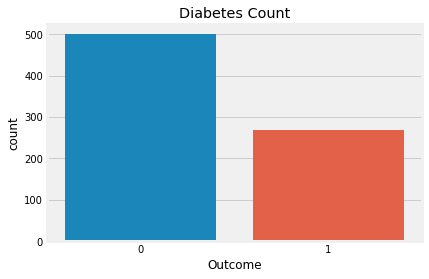

In [8]:
sn.countplot(data['Outcome'])
plt.title('Diabetes Count')
## It's quite imbalanced  ( U can apply SMOTE to resample it but here I will be not resampling it)

#### Missing Values <a id='2'></a>

In [9]:
from sklearn.preprocessing import Imputer
outcome = data['Outcome']
fill_values = Imputer(missing_values=0,strategy="mean",axis=0) # Replace missing values with mean
data = fill_values.fit_transform(data)

data = pa.DataFrame({'Pregnancies': data[:, 0], 'Glucose': data[:, 1],'BloodPressure':data[:, 2],
                        'SkinThickness':data[:, 3],'Insulin':data[:, 4],'BMI':data[:, 5],'DiabetesPedigreeFunction':data[:, 6],
                        'Age':data[:, 7],'Outcome':outcome})

C:\Users\BABI\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


##### Glucose

Text(0.5, 1.0, 'Box Plot ')

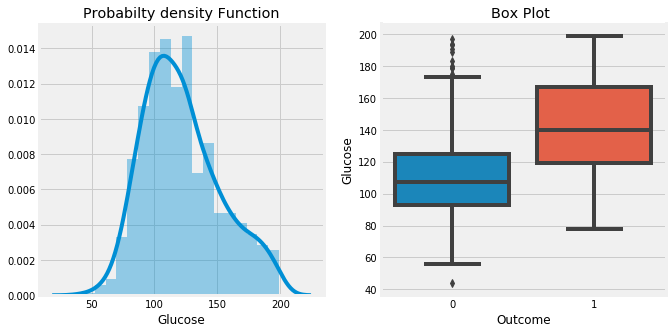

In [10]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sn.distplot(data['Glucose'],ax=axis1).set_title('Probabilty density Function')
sn.boxplot(x='Outcome',y='Glucose',data=data).set_title('Box Plot ')

##### Blood Pressure

Text(0.5, 1.0, 'Box Plot ')

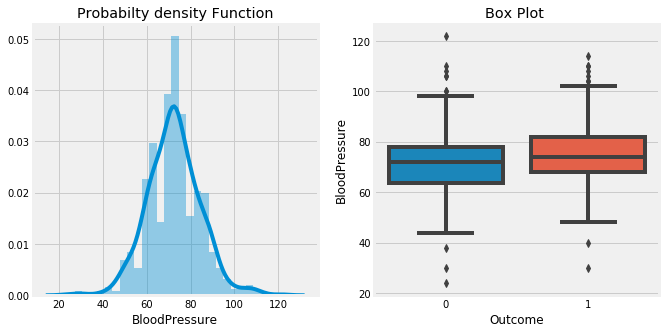

In [11]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sn.distplot(data['BloodPressure'],ax=axis1).set_title('Probabilty density Function')
sn.boxplot(x='Outcome',y='BloodPressure',data=data).set_title('Box Plot ')

##### Insulin

Text(0.5, 1.0, 'Box Plot ')

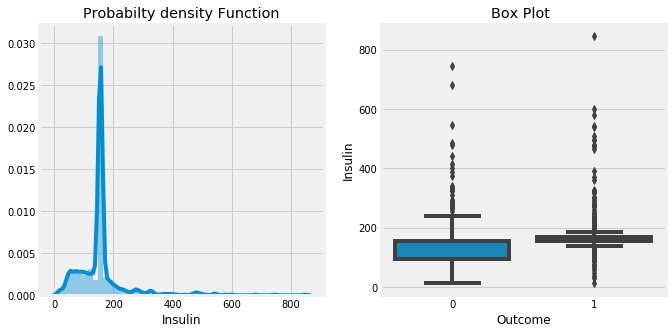

In [12]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sn.distplot(data['Insulin'],ax=axis1).set_title('Probabilty density Function')
sn.boxplot(x='Outcome',y='Insulin',data=data).set_title('Box Plot ')

##### Age


Text(0.5, 1.0, 'Box Plot ')

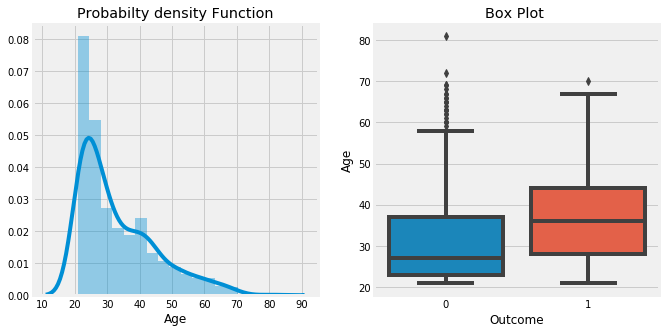

In [13]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sn.distplot(data['Age'],ax=axis1).set_title('Probabilty density Function')
sn.boxplot(x='Outcome',y='Age',data=data).set_title('Box Plot ')

##### BMI

Text(0.5, 1.0, 'Box Plot ')

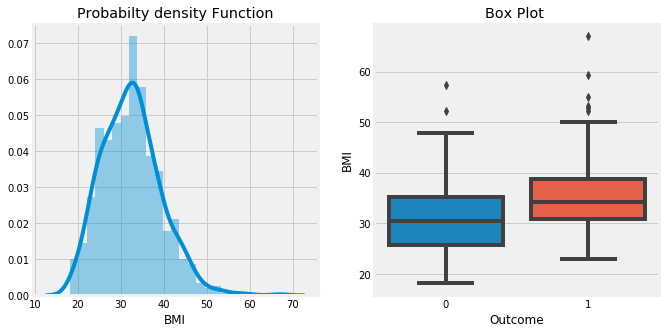

In [14]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sn.distplot(data['BMI'],ax=axis1).set_title('Probabilty density Function')
sn.boxplot(x='Outcome',y='BMI',data=data).set_title('Box Plot ')

##### Pregnancies


Text(0.5, 1.0, 'Box Plot ')

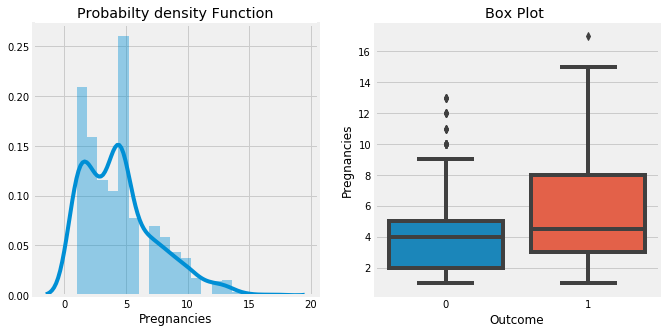

In [15]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sn.distplot(data['Pregnancies'],ax=axis1).set_title('Probabilty density Function')
sn.boxplot(x='Outcome',y='Pregnancies',data=data).set_title('Box Plot ')

##### Observation from the above plots
We can see that glucose is quite symmetric to normal distribution and average people having a glucose level of 100 to 120 & we also noticed that the person with a high glucose level have more likely to have diabetes.

Average blood pressure level of perople is around 70, and if we notice at the box plot, bloodpressure has not a significat realtion with 'Outcome'.But the preson with a high blood pressure i.e hypertension is more likely to have diabetes as high blood pressure can damage kidneys,eye and other body oragans.

Next from feature insulin we noticed it's totally right skewed (later we we normalize it) and it can be a important feature(We will check it later in feature selection).

Age is aslo right skewed but from box plot we can notice that it's perfomring well in classification,old age person are more likely to have diabetes.

Womans having high BMI are more likely to have diabetes. Pregrancies is also doing a great job in classification the chance of getting a diabetes increases as no of pregnancies increases. 

##### Plotting Violin Plot 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

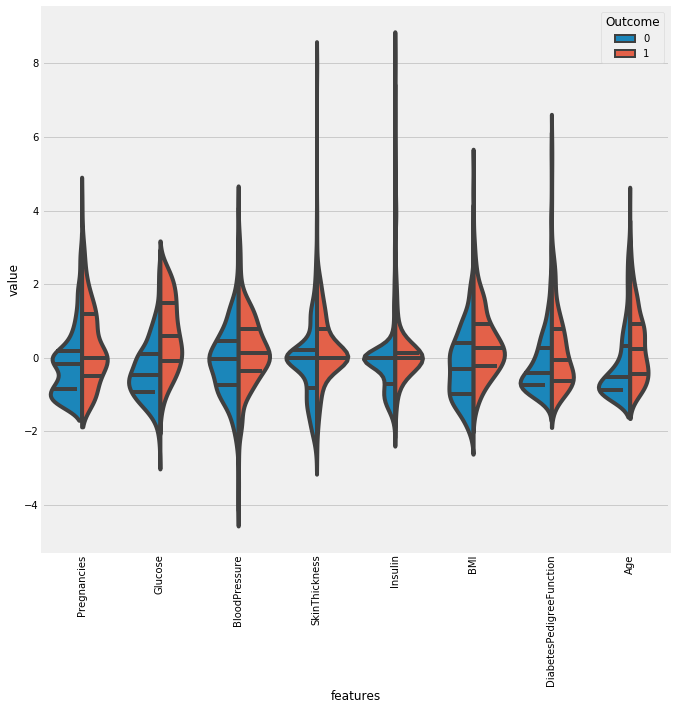

In [16]:
y = data['Outcome']
data_x = data
data_x=data_x.drop('Outcome',axis=1)

data_n_2 = (data_x - data_x.mean())/(data_x.std())
dataz = pa.concat([y,data_n_2.iloc[:,0:9]],axis=1)

dataz = pa.melt(dataz,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
#dataz.drop(dataz[dataz.features == 0].index,inplace=True)

plt.figure(figsize=(10,10))
sn.violinplot(x="features", y="value", hue="Outcome", data=dataz,split=True, inner="quart")
plt.xticks(rotation=90)

Here from feature Blood pressure we can see that the median of this feature is seperated so it can be imporntant for classification
and also same for Pregnancies and Glucose.

##### Pregnencies + Age + Outcome

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

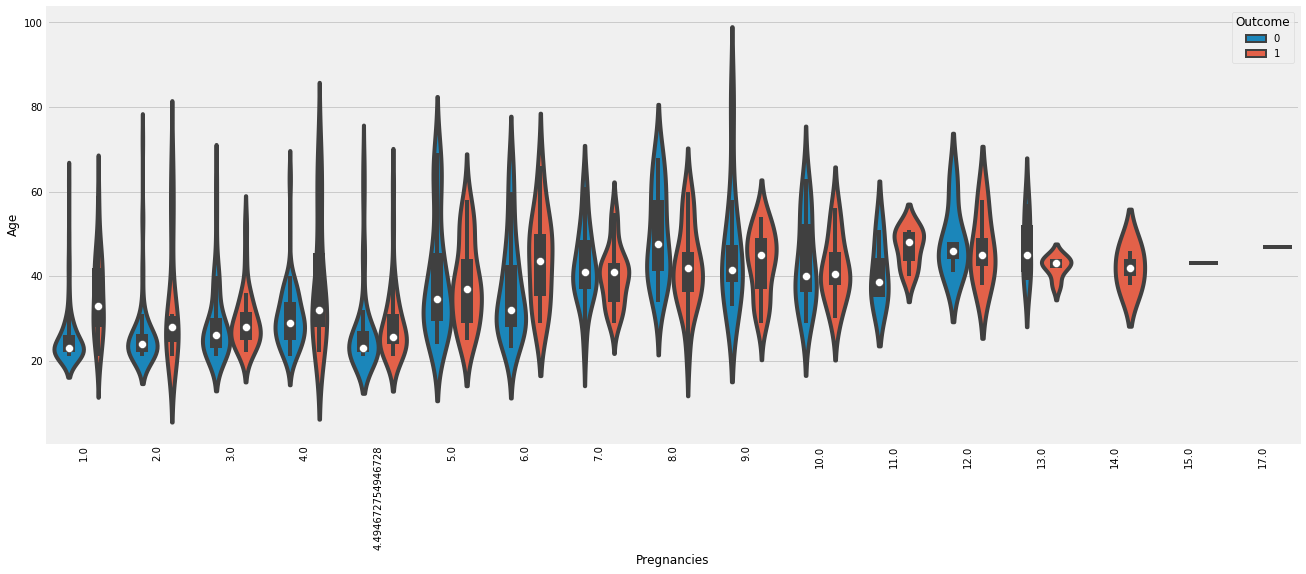

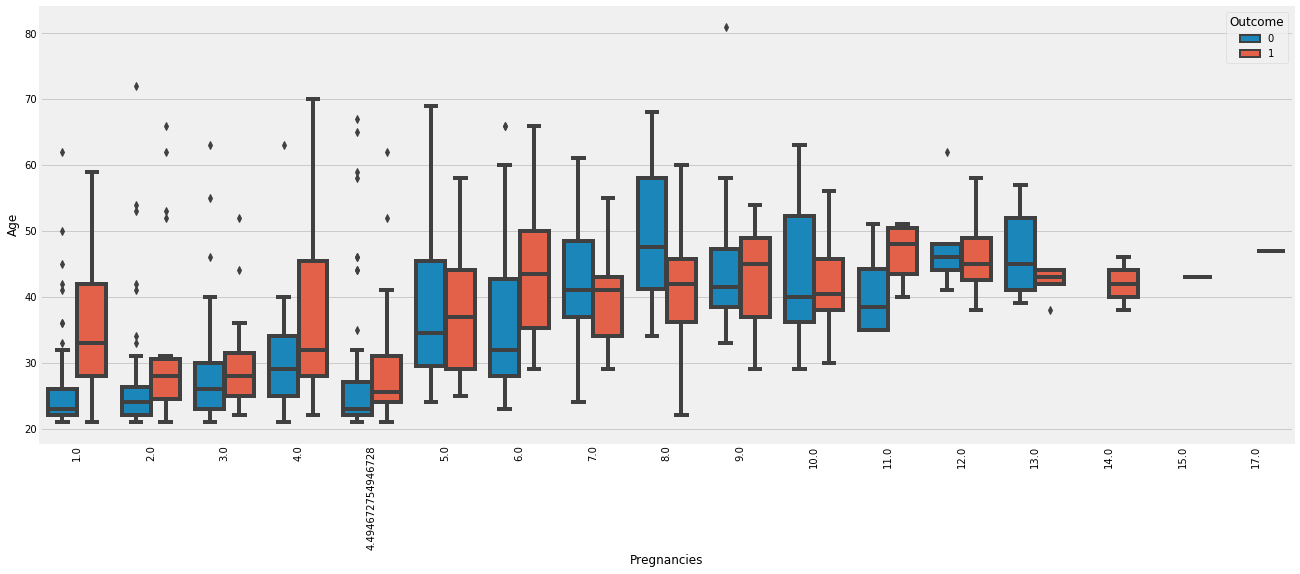

In [17]:
plt.figure(figsize=(20,8))
sn.violinplot(x='Pregnancies',y='Age',hue='Outcome',data=data)
plt.xticks(rotation=90)
## Pregnencies + Age + Outcome
plt.figure(figsize=(20,8))
sn.boxplot(x='Pregnancies',y='Age',hue='Outcome',data=data)
plt.xticks(rotation=90)

##### Pregnencies + BloodPressure

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

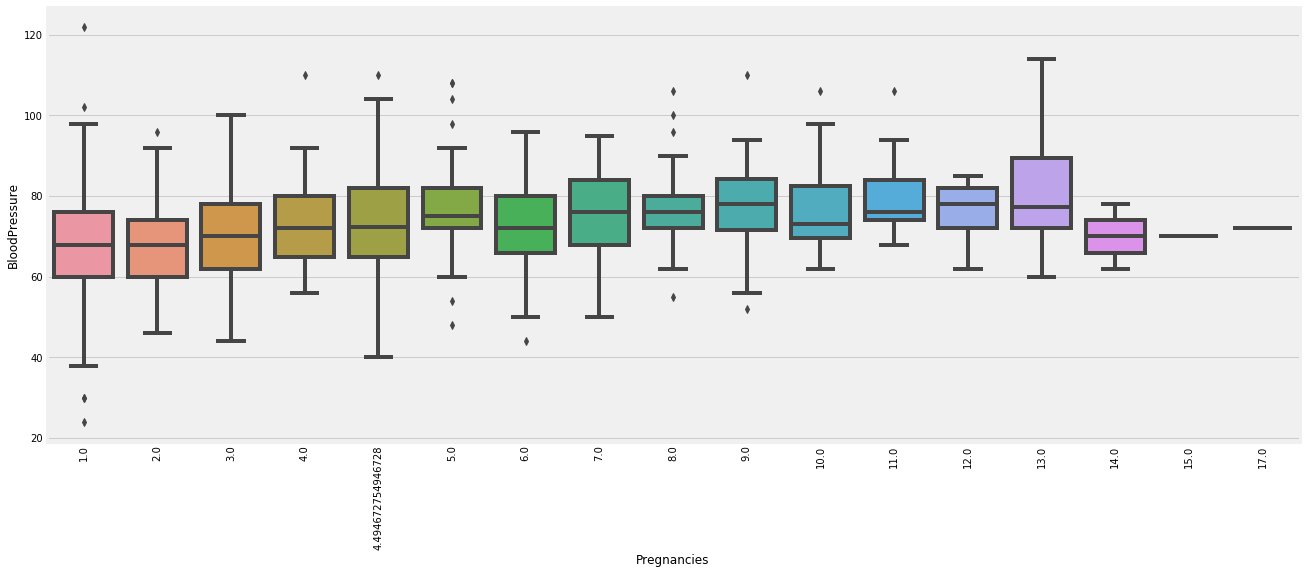

In [18]:
plt.figure(figsize=(20,8))
sn.boxplot(x='Pregnancies',y='BloodPressure',data=data)
plt.xticks(rotation=90)

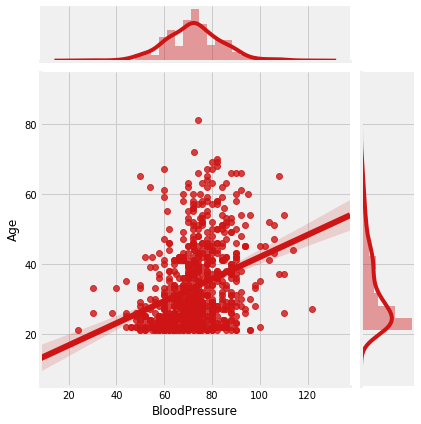

In [19]:
sn.jointplot(data['BloodPressure'],data['Age'],kind='regg',color="#ce1414")

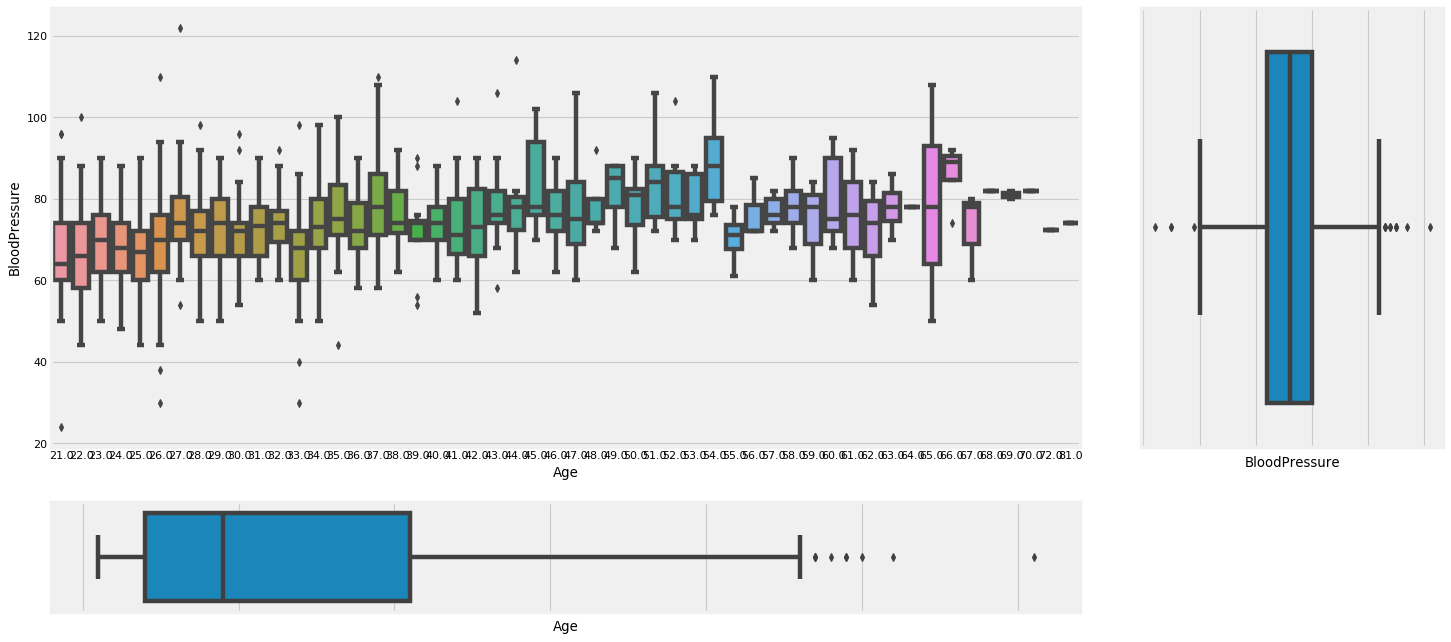

In [20]:
fig = plt.figure(figsize=(20, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

sn.boxplot(x='Age',y='BloodPressure',data=data,ax=ax_main)
sn.boxplot(data['BloodPressure'],ax=ax_right)
sn.boxplot(data['Age'],ax=ax_bottom)

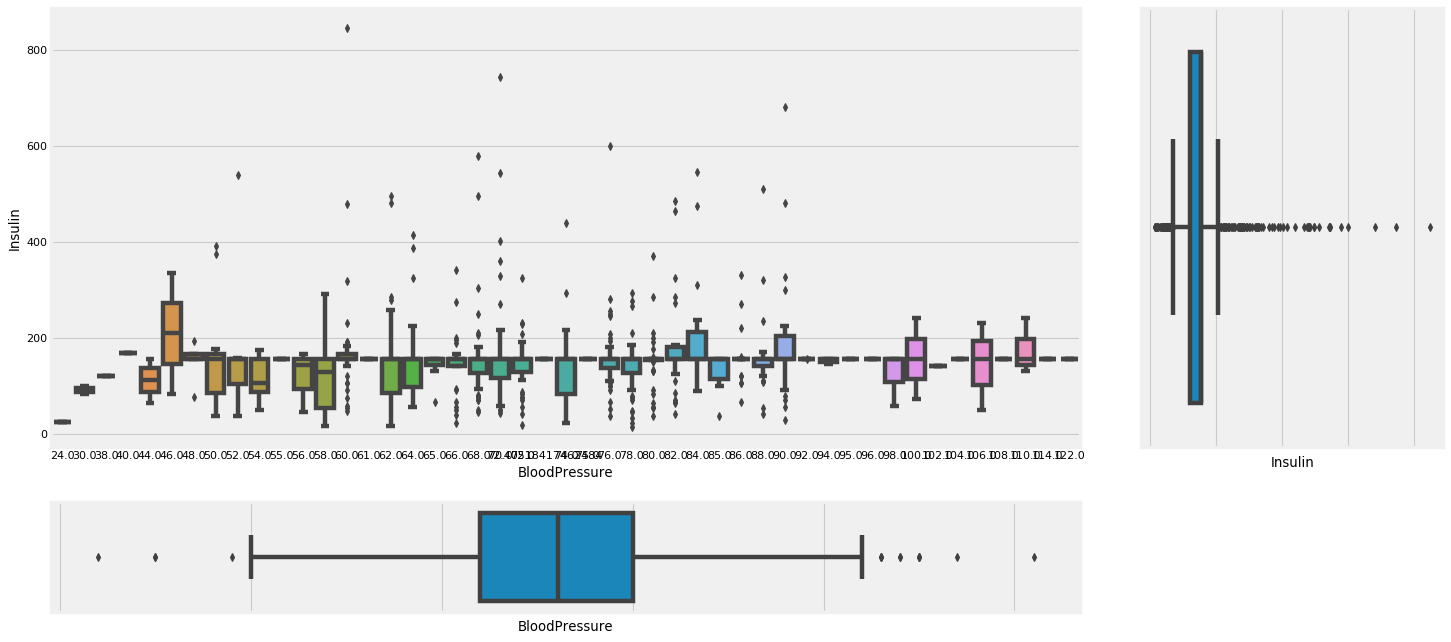

In [21]:
fig = plt.figure(figsize=(20, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

sn.boxplot(x='BloodPressure',y='Insulin',data=data,ax=ax_main)
sn.boxplot(data['Insulin'],ax=ax_right)
sn.boxplot(data['BloodPressure'],ax=ax_bottom)

People from age group 30 to 40 have a blood pressure level between 60 to 90 and after that age peoples are having higher blodd pressure (more than 100).

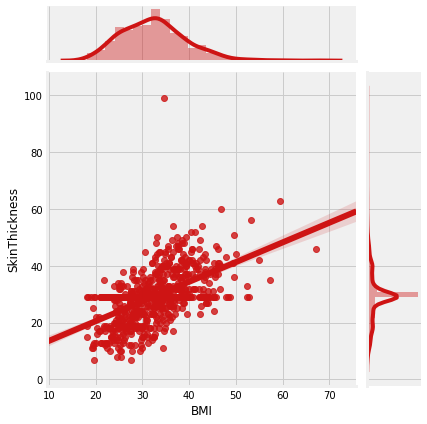

In [22]:
sn.jointplot(data['BMI'],data['SkinThickness'],kind='regg',color="#ce1414")

##### Pairplot

In [23]:
features = list(data.columns)
features.remove('Outcome')

<Figure size 1440x800 with 0 Axes>

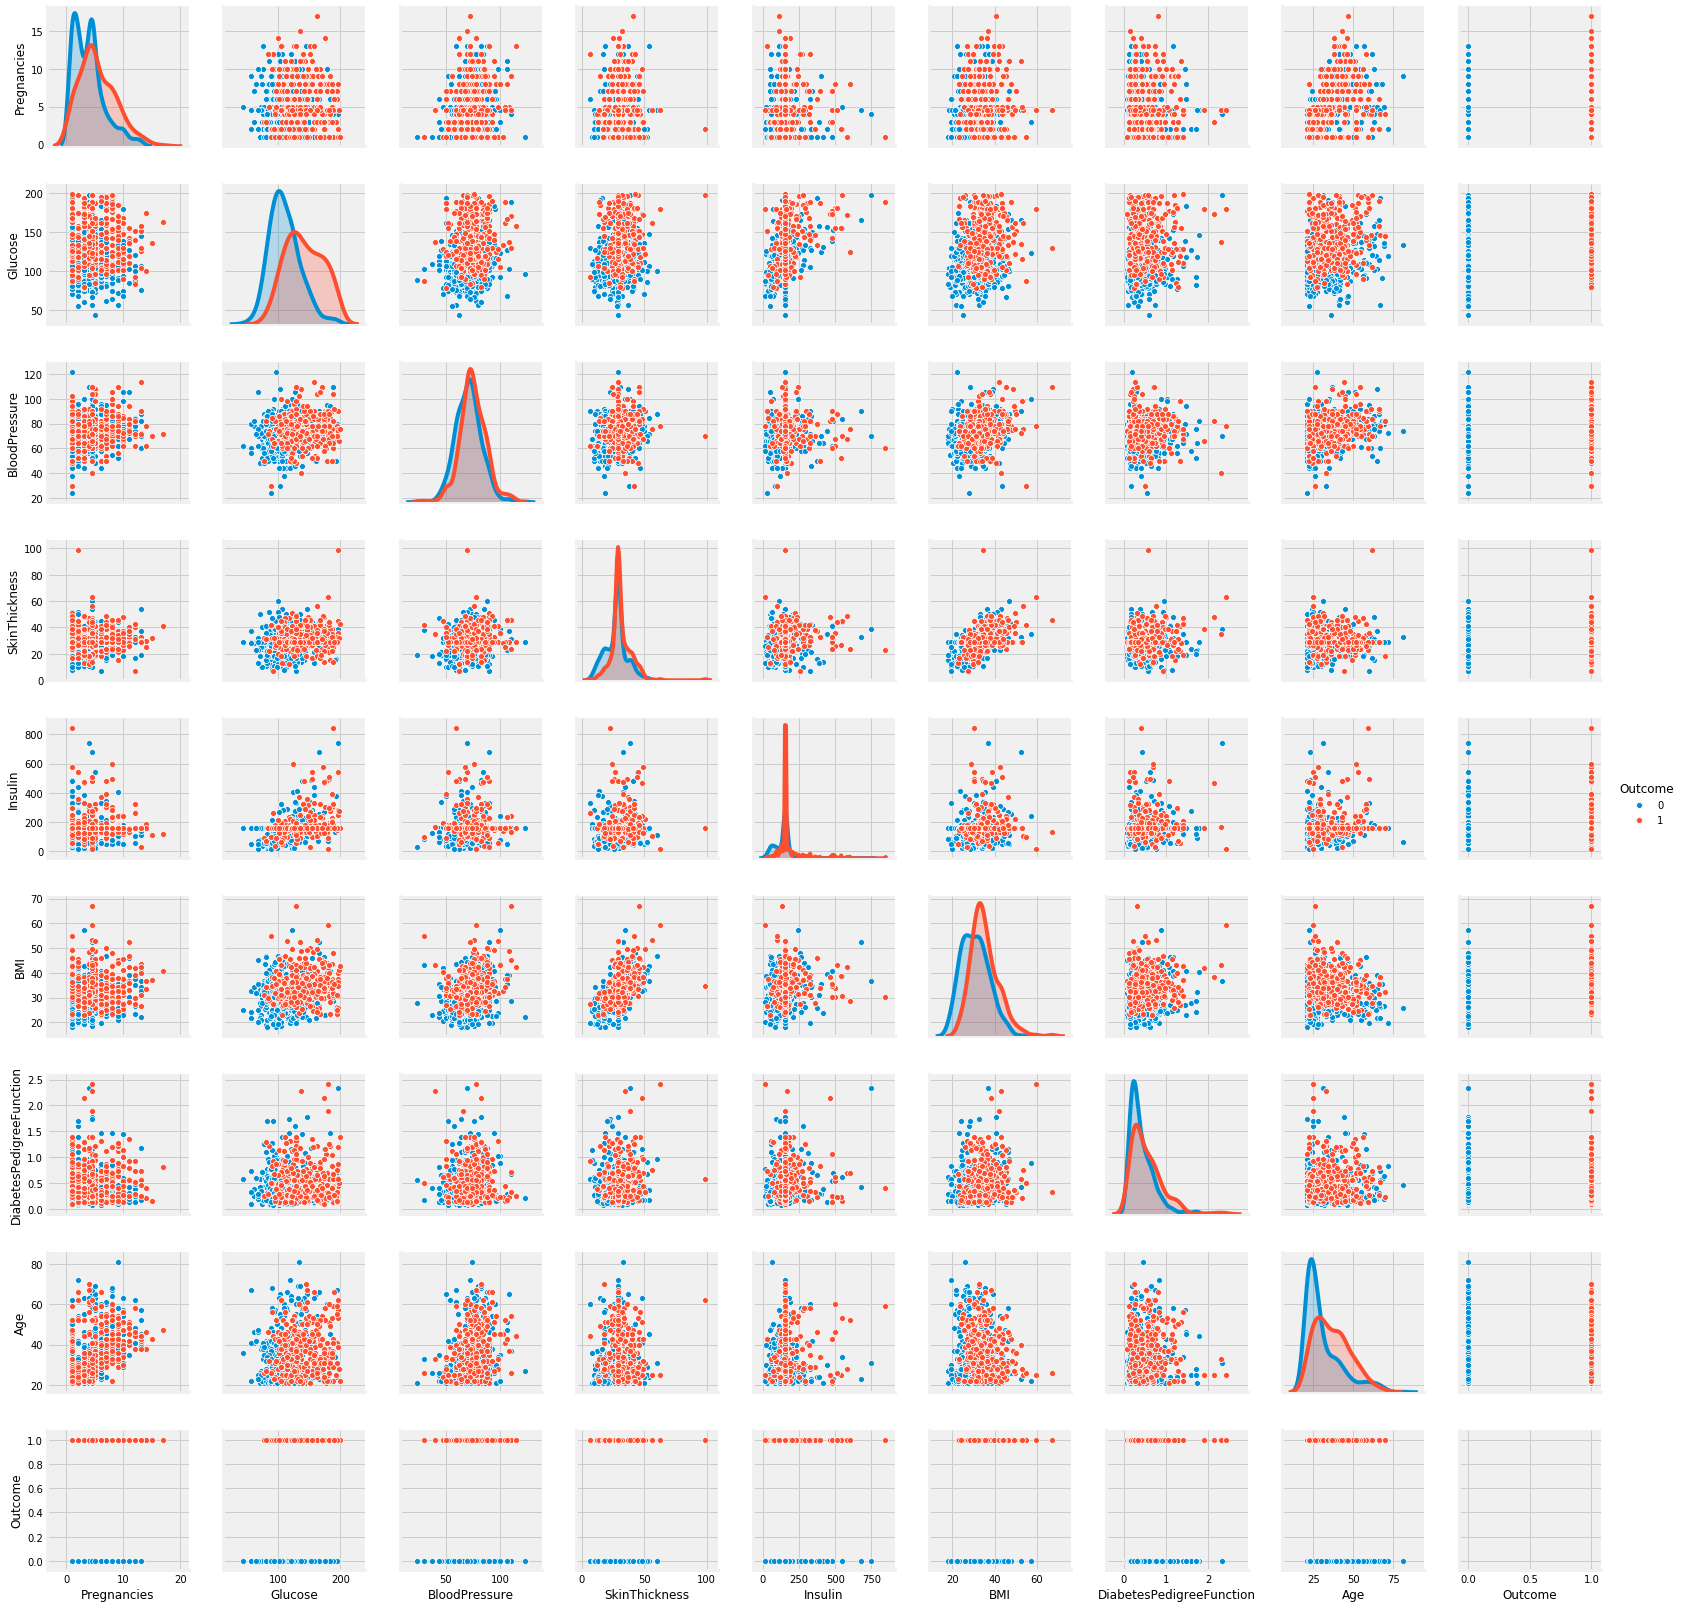

In [24]:
plt.figure(figsize=(18,10), dpi= 80)
sn.pairplot(data,kind='scatter',hue='Outcome')

##### Observations from above plots:

Having a high glucose level, the chance of having diabetes is more &
As age increases the chance of having diabetes also increases
.I also noticed that if the woman having a high body mass index then the skin thickness of that person is also high,  whereas having excess BMI is more likely to having diabetes.

###### Swarm Plot For identifying importance of features whether the feature is important for classification

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

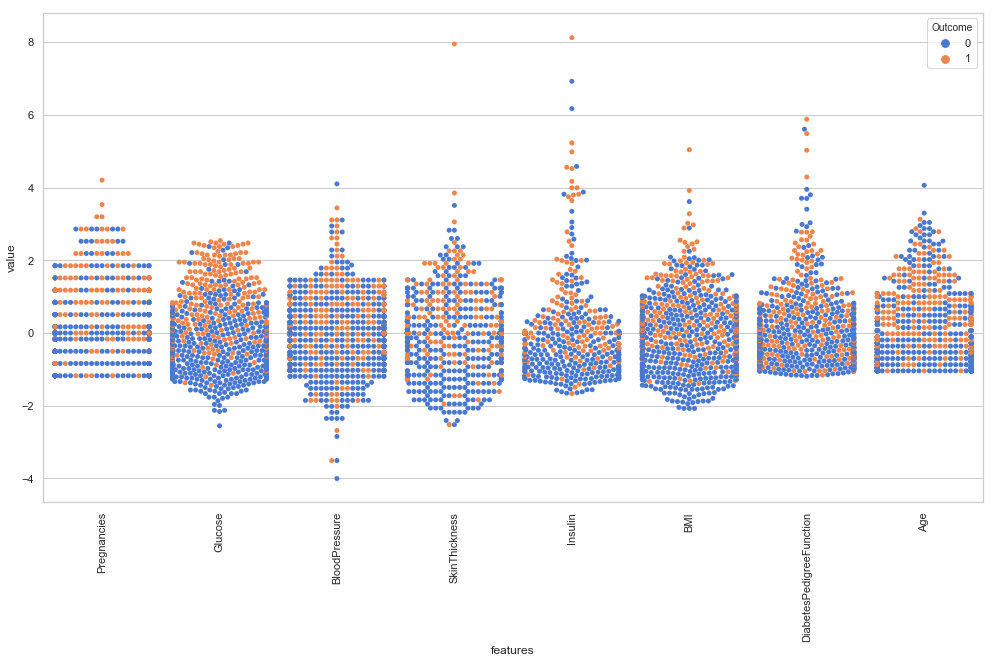

In [25]:
sn.set(style='whitegrid',palette='muted')
y = data['Outcome']
data_x = data
data_x=data_x.drop('Outcome',axis=1)

data_n_2 = (data_x - data_x.mean())/(data_x.std())
dataz = pa.concat([y,data_n_2.iloc[:,0:9]],axis=1)

dataz = pa.melt(dataz,id_vars="Outcome",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(15,9))
sn.swarmplot(x='features',y='value',hue='Outcome',data=dataz)
plt.xticks(rotation=90)

I used swarm plot to identify which feature is performing well in classification.Glucose is really a important feature as in the swarm plot we can see that it is seperating both the class(0 / 1).Other feature like SkinThickness,BloodPressure etc are not doing the classification well., I am not saying the other feature is important I will later use some feature seletion techniques for indentifying the best features. 

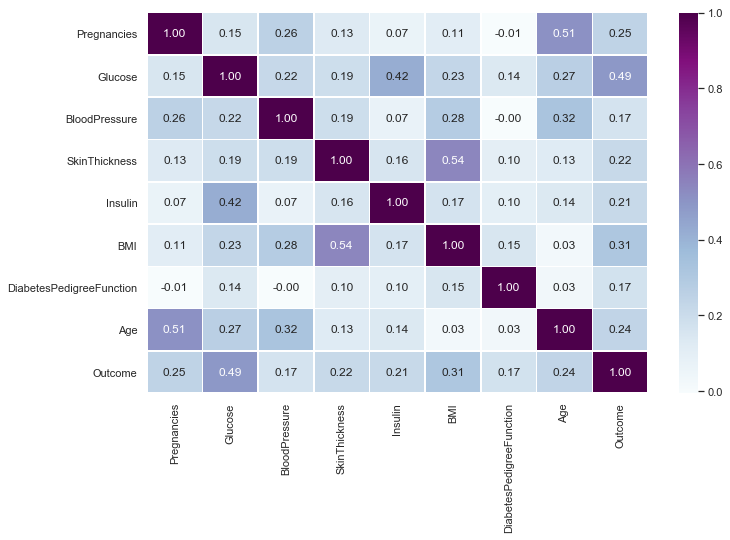

In [26]:
plt.figure(figsize=(10,7))
sn.heatmap(data.corr(),annot=True,linewidths=.5, fmt= '.2f',cmap='BuPu')

Glucose,Pregnancies,BMI,Age has a strong corelation with Outcome (Target Variable) and there is no probelm of multicolinearity.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [28]:
radm_state = 42

In [29]:
train = data[features][0:760]
y = data['Outcome'][0:760]
test = data[features][760:]
actual_test = data['Outcome'][760:]

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(train,y,random_state=radm_state,test_size=0.2)

#### Checking the accuracy before applying feature selection

Accuracy0.6973684210526315


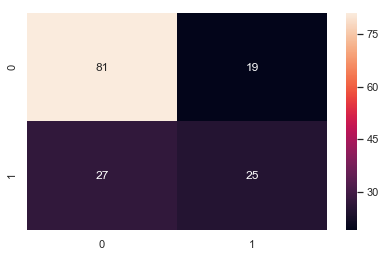

In [31]:
radm_classifier= RandomForestClassifier(random_state=42)
radm_model = radm_classifier.fit(X_train,Y_train)

accuracy = accuracy_score(Y_test,radm_classifier.predict(X_test))
print("Accuracy{}".format(accuracy))

cm = confusion_matrix(Y_test,radm_classifier.predict(X_test))
sn.heatmap(cm,annot=True,fmt="d")

Random forest model to see the accuracy score becuause we will need this score later to comapre how our model performs after feature selection. So,here this model is able to give 71% accuracy.

#### Partial Dependence Plots<a id='3'></a>

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex.

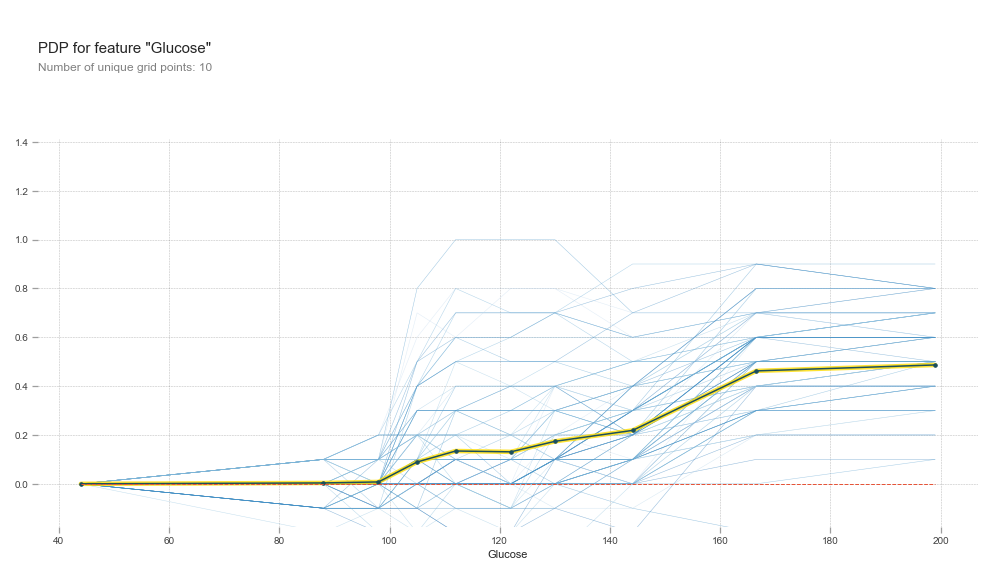

In [32]:
from pdpbox import pdp, info_plots
pdp_ = pdp.pdp_isolate(
    model=radm_model, dataset=X_train, model_features=features, feature='Glucose'
)
fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp_, feature_name='Glucose', center=True, 
     plot_lines=True, frac_to_plot=100
)

From here we can see that if the person is having a glucose level more than 100 then his chance of having a diabetes also increases ,I am doing this PDP plots for only feature Glucose we can do also on other features.
For more information ->https://christophm.github.io/interpretable-ml-book/pdp.html

### SHAP<a id='4'></a> 
SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.Check the documentation here https://shap.readthedocs.io/en/latest/

![](http://shap.readthedocs.io/en/latest/_images/shap_diagram.png)

In [33]:
import shap
X_train = X_train.reset_index(drop=True)
estimator = radm_model
shap_explain = shap.TreeExplainer(estimator)
shap_values = shap_explain.shap_values(X_train.iloc[589])

shap.initjs()
shap.force_plot(shap_explain.expected_value[1], shap_values[1],X_train.iloc[589])

Feature causing increase in prediction are the pink ones and feature causing decrease in prediction are the blue ones , 
here the base value is is 0.34 and output value is 0.8.This person is classified as diabetic person features that have significant influence  are SkinThickness 43,DiabetesPedigreeFunction 1.39, BMI = 49.9,Glucose =199.
The value of Age and Pregnancies is quite low and it  tries to neglate the effect but couldn't because the combined total effect of the pink features is much more.

### Feature Selection-(Univariate Feature Selection, Recursive Feature Elimination, Tree based Feature selection )

#### Univariate feature Selection<a id='5'></a>

In [34]:
select_feature = SelectKBest(chi2,k=5).fit(X_train,Y_train)

In [35]:
#print(select_feature.scores_)
#print(X_train.columns)
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)

radm_classifier= RandomForestClassifier(random_state=42)
radm_model = radm_classifier.fit(x_train_2,Y_train)

Accuracy0.756578947368421


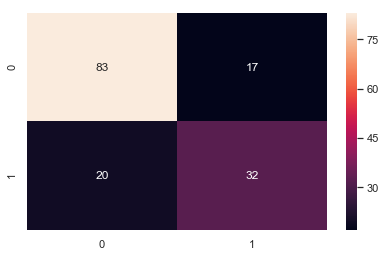

In [36]:
accuracy = accuracy_score(Y_test,radm_classifier.predict(x_test_2))
print("Accuracy{}".format(accuracy))

cm = confusion_matrix(Y_test,radm_classifier.predict(x_test_2))
sn.heatmap(cm,annot=True,fmt="d")

After applying our model on 5 best features the accuracy is more or less same

#### Recursive feature Elimination with cross validation and random forest classification<a id='6'></a>

In [37]:
from sklearn.feature_selection import RFECV

In [38]:
random_classifer = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=random_classifer,step=1,cv=5,scoring='accuracy')

rfcev_model = rfecv.fit(X_train,Y_train)

print("Optimal No. of features:",rfcev_model.n_features_)
print("Best Features:",X_train.columns[rfcev_model.support_])

Optimal No. of features: 7
Best Features: Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


The optimal no of features are 7 they are 'Pregnancies', 'Glucose', 'Insulin', 'SkinThickness', 'BMI',
'DiabetesPedigreeFunction', 'Age'. Recursive feature Elimination with cross validation  tells us that the accuracy of our model will be best if we train our model with this features.

Accuracy0.743421052631579


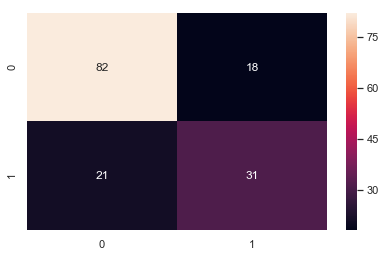

In [39]:
optimal_features =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']

radm_model_test = random_classifer.fit(X_train[optimal_features],Y_train)
accuracy = accuracy_score(Y_test,random_classifer.predict(X_test[optimal_features]))
print("Accuracy{}".format(accuracy))
cm = confusion_matrix(Y_test,random_classifer.predict(X_test[optimal_features]))
sn.heatmap(cm,annot=True,fmt="d")

After training our model with that 7 features it is giving a accuracy of 73.68% which is slighlty more than previous one.

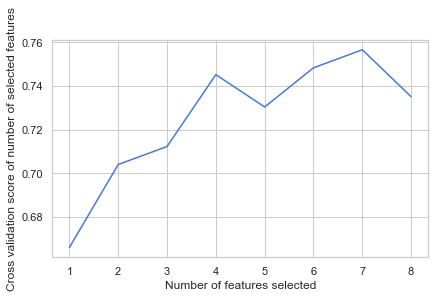

In [40]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfcev_model.grid_scores_) + 1), rfcev_model.grid_scores_)
plt.show()

#### Feature Importance<a id='7'></a>

Feature ranking:
1. feature 1 (0.251637)
2. feature 5 (0.157093)
3. feature 7 (0.153014)
4. feature 6 (0.118563)
5. feature 4 (0.096963)
6. feature 3 (0.077117)
7. feature 0 (0.076649)
8. feature 2 (0.068964)


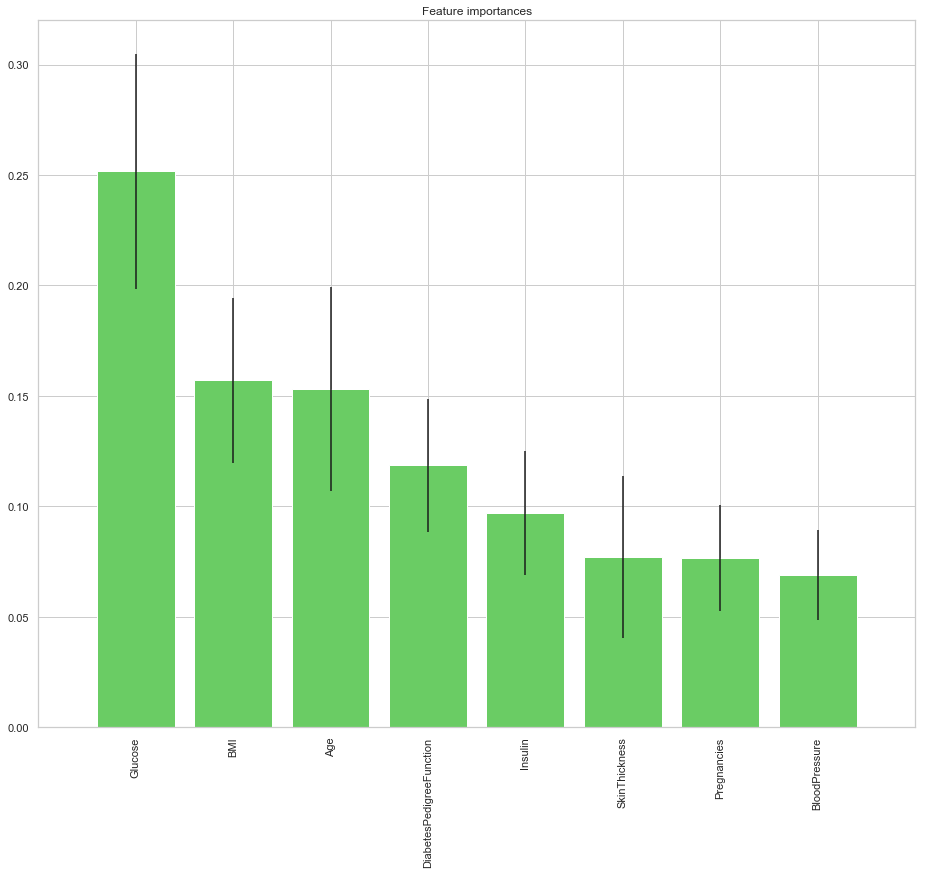

In [41]:
clf_rf_5 = RandomForestClassifier(random_state=42)      
clr_rf_5 = clf_rf_5.fit(X_train,Y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Glucose BMI DiabetesPedigreeFunction and Age are the 4 best features(70% variance is explained by this 4 features).

#### Scaling<a id='6'></a>

##### Here I will be applying standarization to starndarize the data 
Here I am doing Standarization because parametric models like linear regression,logistic regression, KNN,requires the data to be normalize else it will perfom very badly.Whereas in ensemble models it does not require the data to be standarize, if standarized then also it's not a problem.

In [42]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
train = standard_scaler.fit_transform(train[optimal_features])
test = standard_scaler.transform(test[optimal_features])

#### Algorithms

1.Logistic Regression                                                                                          
2.KNN                                                                                                              
3.Random Forest                                                                                             
4.AdaBoost                                                                                             
5.Gradient Boosting                                                                                             
6.XGBoost                                                                                                          

In [43]:
from sklearn.model_selection import cross_val_score,StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(train,y,test_size=0.2,random_state=42)
cv = StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=42)

scoring = 'roc_auc'

In [45]:
model_scores = pa.DataFrame(columns=['Name','Best Parameters','Best Score','Test Score','CV Mean','CV Std'])

In [46]:
color = sn.color_palette()
sn.set_style('darkgrid')

In [47]:
def helper_function(name,model):
    global model_scores
    
    model_lf = model.best_estimator_.fit(X_train,Y_train)
    scores = cross_val_score(model.best_estimator_,X_train,Y_train,cv=5,scoring=scoring,verbose=0)
    
    cross_mean  = scores.mean()
    cross_std = scores.std()
    
    test_score = model.score(X_test,Y_test)
    
    model_scores = model_scores.append({'Name':name,'Best Parameters':model.best_params_,
                                        'Best Score':model.best_score_,'Test Score':test_score,
                                        'CV Mean':cross_mean,'CV Std':cross_std },ignore_index=True)
    
    fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))
    
    
    ## Draw Confusion Matrix.
    
    
    predicted_value = model.best_estimator_.predict(X_test)
    cm = metrics.confusion_matrix(Y_test,predicted_value)
    sn.heatmap(cm,annot=True,fmt=".2f",cmap='BuPu',ax=axis1).set_title("Confusion Matrix")
    
    ## Draw Roc Curve
    
    test_results_df = pa.DataFrame({'actual':Y_test})
    test_results_df = test_results_df.reset_index()
    
    predict_probabilites = pa.DataFrame(model.best_estimator_.predict_proba(X_test))
    test_results_df['chd_1'] = predict_probabilites.iloc[:,1:2]
    
    fpr,tpr,thresholds = metrics.roc_curve(test_results_df.actual,test_results_df.chd_1,drop_intermediate=False)
    
    auc_score = metrics.roc_auc_score(test_results_df.actual,test_results_df.chd_1)
    
    plt.plot(fpr,tpr,label="ROC Curve (area = %.2f)"% auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    
    ## print classification rreport
    
    print(metrics.classification_report(Y_test,predicted_value))
    pass

#### Modelling

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgm

##### Logistic Regression<a id='8'></a>

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.65      0.60      0.62        52

    accuracy                           0.75       152
   macro avg       0.72      0.71      0.72       152
weighted avg       0.75      0.75      0.75       152



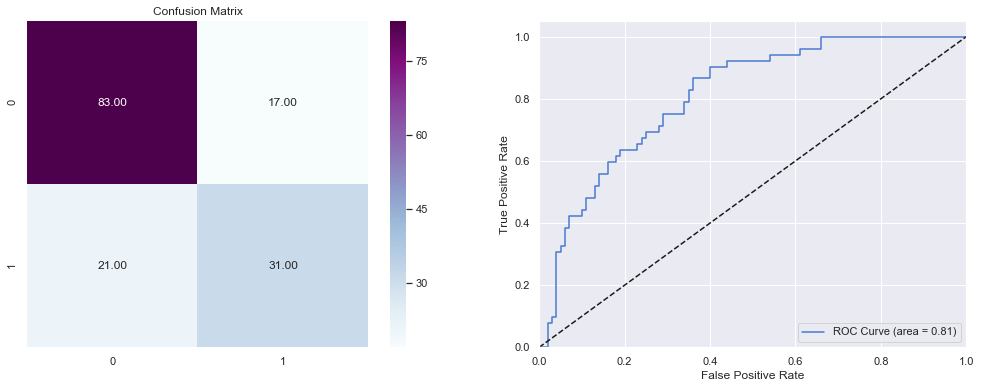

In [49]:
logit_model = LogisticRegression()

param_grid = {'C':[0.001,0.01,0.05,1,100],'penalty':['l1','l2']}
logit_grid = GridSearchCV(logit_model,param_grid,cv=cv,scoring=scoring)
logit_grid.fit(X_train,Y_train)
helper_function("Logistic Regression",logit_grid)

##### KNN<a id='9'></a>

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.58      0.56      0.57        52

    accuracy                           0.71       152
   macro avg       0.68      0.67      0.68       152
weighted avg       0.71      0.71      0.71       152



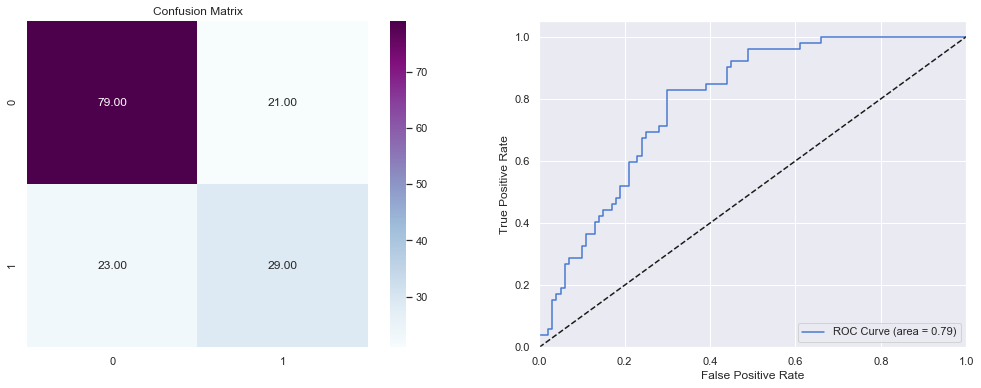

In [50]:
param_grid = {'n_neighbors':[x for x in range(1,40)],'weights':['uniform','distance']}

knn_model =  KNeighborsClassifier()

knn_grid  = RandomizedSearchCV(knn_model,param_grid,cv=cv,scoring=scoring,random_state=42)
knn_grid.fit(X_train,Y_train)
helper_function("K-Nearest-Neighbors",knn_grid)

##### Random Forest<a id='10'></a>

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.64      0.67      0.65        52

    accuracy                           0.76       152
   macro avg       0.73      0.74      0.73       152
weighted avg       0.76      0.76      0.76       152



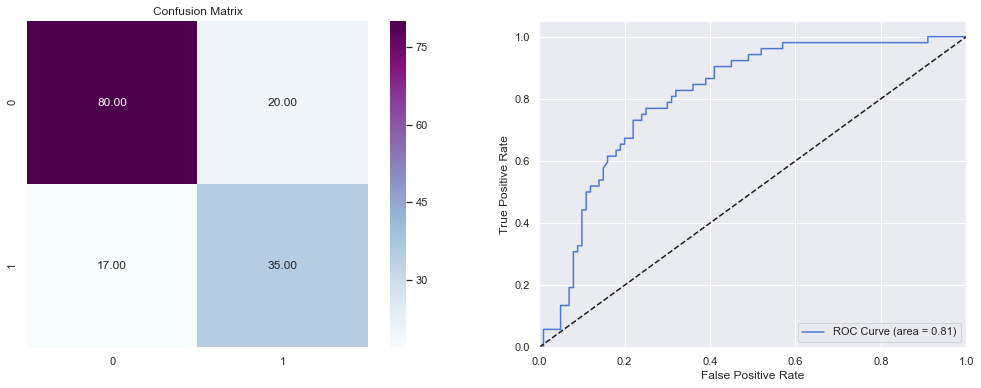

In [51]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)] #Boosting parameters
max_features = ['auto', 'sqrt']# Boosting Parameters
max_depth = [int(x) for x in np.linspace(10,200,num=20)] #Max depth of the tree
max_depth.append(None)
bootstrap = [True,False] # Bootstrap here means how the samples will be chosen with or without replacement

# Total Combination 10*2*20*2 = 800 !

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'bootstrap':bootstrap}

random_model = RandomForestClassifier()
grid_random = RandomizedSearchCV(radm_model,param_grid,cv=cv,scoring=scoring,n_iter=100,random_state=42)

grid_random.fit(X_train,Y_train)
helper_function("RADNOM FOREST",grid_random)

> ##### AdaBoost<a id='11'></a>

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.65      0.60      0.62        52

    accuracy                           0.75       152
   macro avg       0.72      0.71      0.72       152
weighted avg       0.75      0.75      0.75       152



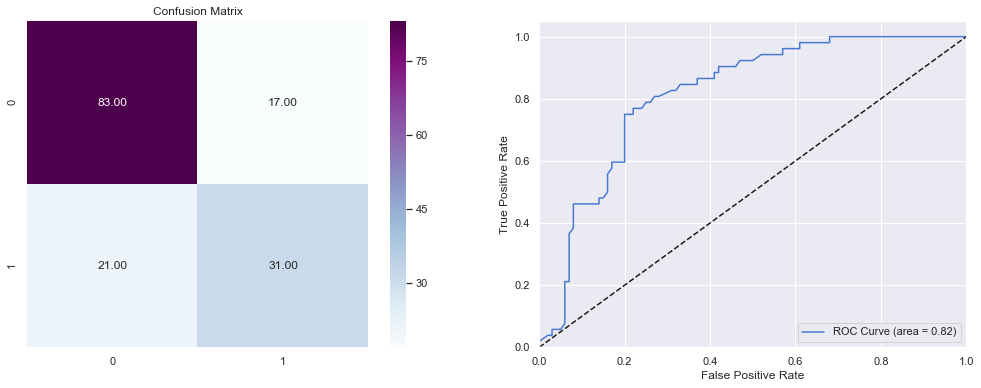

In [52]:
ada_model = AdaBoostClassifier()

param_grid = {'n_estimators':[int(x) for x in np.linspace(start=20,stop=300,num=15)],
              'learning_rate':np.arange(.1,4,.3)}

ada_grid = RandomizedSearchCV(ada_model,param_grid,cv=cv,scoring=scoring,n_iter=100,random_state=42)

ada_grid.fit(X_train,Y_train)
helper_function("ADA Boost",ada_grid)

##### Gradient Boosting<a id='12'></a>

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       100
           1       0.65      0.65      0.65        52

    accuracy                           0.76       152
   macro avg       0.74      0.74      0.74       152
weighted avg       0.76      0.76      0.76       152



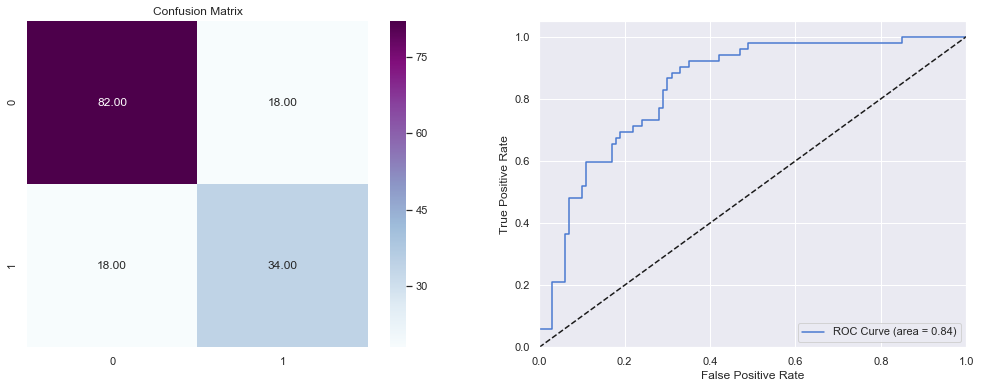

In [53]:
n_estimators = [int(x) for x in np.linspace(start=20,stop=120,num=6)]
learning_rate = [0.1,0.01,0.05,0.001]
max_depth= np.arange(2,5,1)


param_grid = {'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth}

grad_model = GradientBoostingClassifier()

grid_grad = GridSearchCV(grad_model,param_grid,cv=cv,scoring=scoring)
grid_grad.fit(X_train,Y_train)

helper_function("Gradient Boosting",grid_grad)

##### XGBoost<a id='13'></a>

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.60      0.58      0.59        52

    accuracy                           0.72       152
   macro avg       0.69      0.69      0.69       152
weighted avg       0.72      0.72      0.72       152



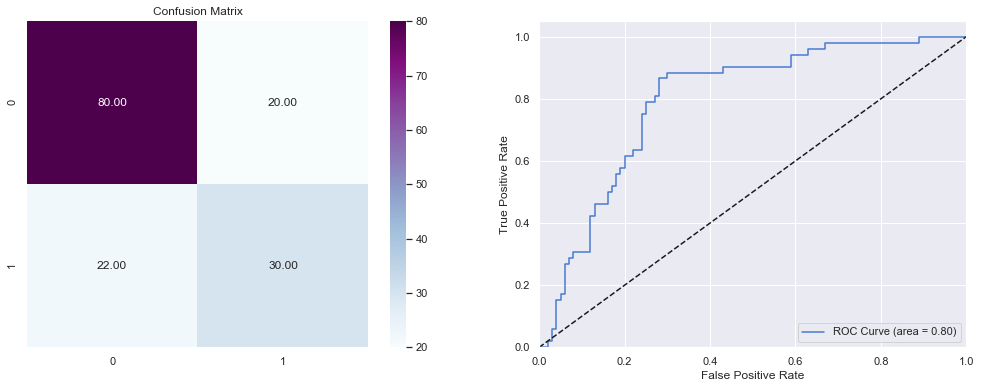

In [54]:
from xgboost.sklearn import XGBClassifier

param_grid = {'max_depth':range(3,8,2),'min_child_weight':range(1,10,2),'gamma':[0.5,1,1.5,2,5],
              'subsample':[0.6,0.8,1.0],'colsample_bytree':[0.6,0.8,1.0]}

xgboost_model = XGBClassifier(learning_rate=0.025,n_estimators=600,objective='binary:logistic',silent=True,nthread=1)
xgboost_grid = RandomizedSearchCV(xgboost_model,param_grid,cv=cv,scoring=scoring,n_iter=100,random_state=42)
xgboost_grid.fit(X_train,Y_train)
helper_function("XGBOOST",xgboost_grid)

#### Compare Models<a id='14'></a>

Here we can see that all the models are predicting the person who is not diabetic much better than the person who is diabetic, so this can be a problem because of our chosen cut-of 0.5. In this problem, we are more likely to give more preference on predicting the person who has diabetic correctly this problem can be solved by using a Cost-Based Approach just we have to give more penalty to false positive. As the cost of false negatives and false positives is not the same, the optimal classification cut-off probability can also be determined using the cost-based approach, which finds the cut-off where the total cost is minimum. In the cost-based approach, we assign penalty cost for misclassification of positive and negative and find the total cost for a cut-off probability.

The performance of all the models can be much more improved by tuning the parameters. 

Here, I am going to choose  XGBoost over all the models as it performing better in classifying diabetic persons, and the cross-validation mean is also fairly good.

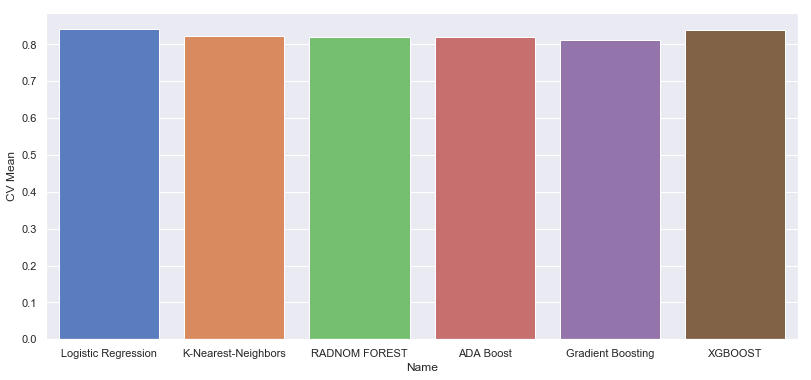

In [55]:
plt.figure(figsize=(12,6))
sn.barplot(x='Name',y='CV Mean',data=model_scores)

In [56]:
#### Traiing the XGBoost  Model

xtreme_gradient_boost_model =xgboost_grid.best_estimator_
xtreme_gradient_boost_model.fit(X_train,Y_train)

print(metrics.classification_report(Y_train,xtreme_gradient_boost_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       394
           1       0.82      0.66      0.73       214

    accuracy                           0.83       608
   macro avg       0.83      0.79      0.80       608
weighted avg       0.83      0.83      0.83       608



#### Prediction<a id='15'></a>

> Here I am predicting the test data that I have created at the beginning which contains only 8 values 6 of which are diabetic and 2 are not diabetic our model can correctly classify both of them but as it's a small test data it's giving very good prediction but if the dataset is large then the accuracy should be varying.

In [57]:
print(metrics.classification_report(actual_test,xtreme_gradient_boost_model.predict(test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [59]:
import pickle
pickle.dump(xtreme_gradient_boost_model,open('xgboost_model','wb'))
pickle.dump(standard_scaler,open('scaler','wb'))

In [61]:
optimal_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']